In [1]:
sql_provs = '''
select /*+ parallel 4 */
    providerid,
    n_encs,
    n_rt n_encs_rt,
    f_encs,
    n_rt/(sum(n_encs) over (partition by 1)) cfac
from (
    select
        providerid,
        count(providerid) n_encs,
        count(providerid)/(select count(providerid) from pcoriprd.pmn_encounter) f_encs,
        sum(count(providerid)) over (partition by 1 order by count(providerid) desc) n_rt
    from pcoriprd.pmn_encounter
    group by providerid
)
order by f_encs desc'''

In [3]:
from epana import db

import getpass

In [4]:
dbconn = db.DbOra('ephelps', getpass.getpass(''), 'hssc-cdwr3-i2b2db-p.clemson.edu', 'i2bhsc')

········


In [5]:
prov_tuples = list(dbconn.query(sql_provs))

In [6]:
prov_tuples[0:10]

[('124712301', 2266282, 2266282, 0.07458044668984318, 0.07458044668984318),
 ('3752601', 205834, 2472116, 0.006773734100150459, 0.08135418078999364),
 ('19581764377', 98784, 2570900, 0.0032508552977120538, 0.0846050360877057),
 ('4151501', 74167, 2645067, 0.002440741262404943, 0.08704577735011064),
 ('19581764375', 72959, 2718026, 0.0024009875249612666, 0.0894467648750719),
 ('4003601', 71592, 2789618, 0.002356001300552735, 0.09180276617562463),
 ('4138601', 66742, 2856360, 0.0021963939937631387, 0.09399916016938778),
 ('3618601', 66240, 2922600, 0.002179873814792339, 0.09617903398418012),
 ('3595701', 64347, 2986947, 0.002117577602059823, 0.09829661158623994),
 ('197844901', 62995, 3049942, 0.002073085008497032, 0.10036969659473698)]

In [7]:
import pandas as pd

In [10]:
prov_df = pd.DataFrame(data=prov_tuples, columns=dbconn.get_column_names())

In [12]:
from matplotlib import pyplot as plt

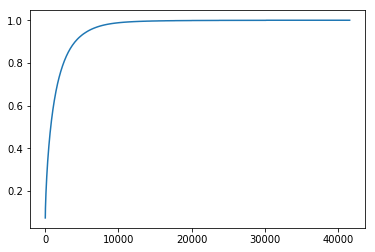

In [13]:
plt.plot(prov_df.CFAC)

In [16]:
prov_df[prov_df.CFAC<0.99].sort_values('CFAC', ascending=False)

PROVIDERID   N_ENCS  N_ENCS_RT    F_ENCS      CFAC
10520  11864724001       89   30082492  0.000003  0.989976
10492   5275908301       89   30082492  0.000003  0.989976
10500    202680701       89   30082492  0.000003  0.989976
10499    196847401       89   30082492  0.000003  0.989976
10498    273380601       89   30082492  0.000003  0.989976
10497  11865451101       89   30082492  0.000003  0.989976
10496  11008308901       89   30082492  0.000003  0.989976
10494    199251001       89   30082492  0.000003  0.989976
10493   5164584301       89   30082492  0.000003  0.989976
10491    236435801       89   30082492  0.000003  0.989976
10502    262970828       89   30082492  0.000003  0.989976
10490   1021634801       89   30082492  0.000003  0.989976
10489    200193101       89   30082492  0.000003  0.989976
10488   3180231001       89   30082492  0.000003  0.989976
10487    155558201       89   30082492  0.000003  0.989976
10486   5174169201       89   30082492  0.000003  0.989976
10485    196956401       89   30082492  0.000003  0.989976
10484  11865399801       89   30082492  0.000003  0.989976
10501    128187701       89   30082492  0.000003  0.989976
10495  30241999801       89   30082492  0.000003  0.989976
10503    130909701       89   30082492  0.000003  0.989976
10512    148484601       89   30082492  0.000003  0.989976
10519  11865010101       89   30082492  0.000003  0.989976
10504   5205539801       89   30082492  0.000003  0.989976
10517    246175901       89   30082492  0.000003  0.989976
10516   5272907101       89   30082492  0.000003  0.989976
10515    220369501       89   30082492  0.000003  0.989976
10514   5275892901       89   30082492  0.000003  0.989976
10513   5275506001       89   30082492  0.000003  0.989976
10518   5203460201       89   30082492  0.000003  0.989976
...            ...      ...        ...       ...       ...
29         4220401    36230    3934467  0.001192  0.129478
28      5164545601    36360    3898237  0.001197  0.128286
27         3614801    36921    3861877  0.001215  0.127089
26     11855564901    37419    3824956  0.001231  0.125874
25       125062301    38466    3787537  0.001266  0.124643
24       124869301    39248    3749071  0.001292  0.123377
23       125097301    39603    3709823  0.001303  0.122086
22      5164525001    40582    3670220  0.001336  0.120782
21         4364401    41354    3629638  0.001361  0.119447
20         4154101    42329    3588284  0.001393  0.118086
19       208068601    42906    3545955  0.001412  0.116693
18         3618301    44366    3503049  0.001460  0.115281
17       205004801    45142    3458683  0.001486  0.113821
16     11855564101    46232    3413541  0.001521  0.112335
15         4153901    46350    3367309  0.001525  0.110814
14         3686501    47916    3320959  0.001577  0.109289
13       202485601    49981    3273043  0.001645  0.107712
12       202443201    54731    3223062  0.001801  0.106067
11       202442801    55798    3168331  0.001836  0.104266
10       202442701    62591    3112533  0.002060  0.102429
9        197844901    62995    3049942  0.002073  0.100370
8          3595701    64347    2986947  0.002118  0.098297
7          3618601    66240    2922600  0.002180  0.096179
6          4138601    66742    2856360  0.002196  0.093999
5          4003601    71592    2789618  0.002356  0.091803
4      19581764375    72959    2718026  0.002401  0.089447
3          4151501    74167    2645067  0.002441  0.087046
2      19581764377    98784    2570900  0.003251  0.084605
1          3752601   205834    2472116  0.006774  0.081354
0        124712301  2266282    2266282  0.074580  0.074580

[10521 rows x 5 columns]